# **Walmart's Inventory Management and Demand Forecasting**

*Our project aims to develop an accurate sales forecasting model for various Walmart stores, leveraging factors such as date, store type, promotions, and environmental information. The model's output will be utilized to optimize inventory levels, preventing stock overflows or shortages that may disrupt product availability and enhance store operational efficiency and customer satisfaction.*

*This notebook will focus on Exploratory Data Analysis (EDA) and insights derived from the dataset. It will examine multiple store-related factors impacting the weekly sales trends*

## **I. Introduction**

**`Members:`**
- Faris Arief Mawardi
- Michael Nathaniel
- Nadia Nabilla Shafira
- Noufal Rifata Reyhan

**`Background:`**

Walmart, one of the world's largest retailers, operates in a variety of locations with different types and sizes of stores. Knowledge of sales trends and the factors that influence them can help Walmart optimize inventory, prevent overstocking or understocking, and improve operational efficiency and customer satisfaction. Inventory management is a crucial aspect of retail operations, as experienced by Walmart. Efficient inventory management requires a deep understanding of the factors that influence sales and the use of accurate forecasting models

**`Objective:`**

Built an accurate sales forecasting model for various Walmart stores by leveraging factors such as date, store type, promotions, and environmental information. In addition, the results of the forecasting model will be used to optimize inventory levels to prevent excess or shortage of stock which could disrupt product availability and increase store operational efficiency and customer satisfaction.

**`About dataset:`**

This dataset comprises sales records from multiple stores, encompassing various parameters such as store ID, date of sales, temperature, fuel prices, promotional markdown details (MarkDown1 to MarkDown5), consumer price index (CPI), unemployment rate, holiday occurrences, store type, size, department number, and the recorded weekly sales. The data includes comprehensive information about sales, store specifics, economic indicators, and promotional activities, providing an overview of retail transactions and contextual factors impacting sales across different stores within a certain timeframe.

**`Problem Statement :`**

- **Who:** This project was carried out to provide insight into the Walmart Management Team responsible for supply chain and sales.
- **What:** The main problem behind this project is the lack of accurate forecasting of sales in various Walmart stores, resulting in difficulties in managing inventory efficiently.
- **Where:** Across Walmart stores operating in various locations and having various store types.
- **Why:** The inability to forecast sales accurately can result in excessive stock or out-of-stock, which impacts product availability and results in financial losses.
- **How:** By implementing the right forecasting model and utilizing it to optimize inventory management strategies, Walmart can improve operational efficiency and increase customer satisfaction.

**`Conclusion of Problem Statement:`**

The lack of accuracy in sales forecasting at Walmart stores results in difficulties in efficient inventory management and can impact potential financial losses. One improvement step that can be taken as a solution is the application of appropriate forecasting models to increase operational efficiency and customer satisfaction.

**`Project Workflow`**

1. **Data Collection:**
    </br>Collects historical weekly sales data from various Walmart stores.
    </br>Collection of data related to store type, environmental information (such as weather data), fuel prices, promotional data, Consumer Price Index (CPI), unemployment rate, and other relevant factors.

2. **Data Exploration and Understanding (EDA):**
    </br>Carry out exploratory data analysis to understand patterns, trends and correlations between existing variables.
    </br>Perform data visualization to gain initial insight into relationships between variables, such as time-to-sales graphs, correlations between certain factors and sales, and more.

3. **Data Cleaning and Preprocessing:**
    </br>Identify and handle missing or invalid values.
    </br>Encoding categorical data.
    </br>Normalization or scaling of data if necessary.

4. **Model Creation:**
    </br>Choose an appropriate forecasting model, such as Time Series (for example ARIMA, SARIMA, or Prophet), regression, or machine learning such as Random Forest, XGBoost, or LSTM Neural Networks.
    </br>Separating data into training data and testing data.
    </br>Train the model on training data and evaluate its performance using relevant metrics (RMSE, MAE, MAPE, etc.) on test data.

5. **Model Validation and Adjustment:**
    </br>Carrying out cross-validation or re-testing the model to re-evaluate its performance and accuracy.
    </br>Adjust model hyperparameters if necessary to improve model performance.

6. **Model Implementation and Inventory Optimization:**
    </br>Apply the best forecasting model to predict future sales.
    </br>Use forecasting results to optimize inventory management strategies, ensuring the availability of the right products at the right time and in the right place.

7. **Monitoring and Evaluation:**
    </br>Monitor model performance periodically.
    </br>Evaluate the impact of using the model on inventory management and actual sales.
    </br>Make adjustments if necessary to improve model accuracy or performance.

8. **Documentation and Communication of Results:**
    </br>Document the steps taken, models used, and evaluation results.
    </br>Communicate results and recommendations to the Walmart management team or other interested parties.

---

# II. Import Libraries

In [1]:
import pandas as pd  # Import Pandas library for data processing
from scipy.stats import skew, kurtosis  # Import Skew and Kurtosis from scipy stats for skewness and kurtosis analysis
import numpy as np  # Import NumPy library for numerical computation

# Import Matplotlib, Seaborn, and PrettyTable from prettytable for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from prettytable import PrettyTable

# Import filter warnings
import warnings
warnings.filterwarnings('ignore')

import phik  # Importing phik for analyzing correlation of categorical data
from phik import phik_matrix  # To compute Phi K correlation matrix
from phik.report import plot_correlation_matrix  # To create visualization of correlation matrix
from phik import report  # To provide reporting and additional analysis to explore relationships between variables in the dataset.

# Feature Engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

# Data Modeling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

---

# III. Data Loading

*This section details the process of loading the dataset that will be utilized in this project.*

In [16]:
# Loading the csv file
data = pd.read_csv("C:\BootcampHacktiv8\Phase2\FTDS-009-HCK-group-003\preprocessed_csv\Walmart's Inventory Management and Demand Forecasting.csv")

---

# IV. Exploratory Data Analysis 

**4.1 Initial Dataset Understanding**

*In this section, we will conduct an initial exploration of the dataset to obtain information and a preliminary understanding of the features and data contained within.*

In [17]:
# Displaying the dataset
data

,Unnamed: 0,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,6587,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,1.0,18689.54
1,6588,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,2.0,44936.47
2,6589,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,3.0,9959.64
3,6590,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,4.0,36826.52
4,6591,1,2011-11-11,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,5.0,31002.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97051,423281,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,93.0,2487.80
97052,423282,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,94.0,5203.31
97053,423283,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,95.0,56017.47
97054,423284,45,2012-10-26,58.85,3.882,4018.91,58.08,100.00,211.94,858.33,192.308899,8.667,False,B,118221,97.0,6817.48


In [18]:
# Displaying the summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97056 entries, 0 to 97055
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    97056 non-null  int64  
 1   Store         97056 non-null  int64  
 2   Date          97056 non-null  object 
 3   Temperature   97056 non-null  float64
 4   Fuel_Price    97056 non-null  float64
 5   MarkDown1     97056 non-null  float64
 6   MarkDown2     97056 non-null  float64
 7   MarkDown3     97056 non-null  float64
 8   MarkDown4     97056 non-null  float64
 9   MarkDown5     97056 non-null  float64
 10  CPI           97056 non-null  float64
 11  Unemployment  97056 non-null  float64
 12  IsHoliday     97056 non-null  bool   
 13  Type          97056 non-null  object 
 14  Size          97056 non-null  int64  
 15  Dept          97056 non-null  float64
 16  Weekly_Sales  97056 non-null  float64
dtypes: bool(1), float64(11), int64(3), object(2)
memory usage: 11.9+ MB


**Insight :**

The dataset contains information related to sales recorded across multiple stores. Here is a brief description of the columns in the dataset:

1. **Store:** Represents the unique identifier for each store.
2. **Date:** Indicates the date of sales records.
3. **Temperature:** Represents the temperature at the time of recording sales.
4. **Fuel_Price:** Indicates the prevailing fuel price at the time of recording sales.
5. **MarkDown1 to MarkDown5:** These columns contain promotional markdown details
6. **CPI:** Stands for Consumer Price Index and indicates changes in retail prices of goods and services.
7. **Unemployment:** Represents the unemployment rate during the time of recording sales.
8. **IsHoliday:** A boolean indicating if the week contains a holiday or not.
9. **Type:** Represents the store type (e.g., A, B, C).
10. **Size:** Represents the store's size.
11. **Dept:** Indicates the department number.
12. **Weekly_Sales:** Reflects the sales for that particular week.


Furthermore, the dataset also contains a redundance column 'Unnamed: 0' which can be dropped due to its significance towards our objective.

In [19]:
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97056 entries, 0 to 97055
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         97056 non-null  int64  
 1   Date          97056 non-null  object 
 2   Temperature   97056 non-null  float64
 3   Fuel_Price    97056 non-null  float64
 4   MarkDown1     97056 non-null  float64
 5   MarkDown2     97056 non-null  float64
 6   MarkDown3     97056 non-null  float64
 7   MarkDown4     97056 non-null  float64
 8   MarkDown5     97056 non-null  float64
 9   CPI           97056 non-null  float64
 10  Unemployment  97056 non-null  float64
 11  IsHoliday     97056 non-null  bool   
 12  Type          97056 non-null  object 
 13  Size          97056 non-null  int64  
 14  Dept          97056 non-null  float64
 15  Weekly_Sales  97056 non-null  float64
dtypes: bool(1), float64(11), int64(2), object(2)
memory usage: 11.2+ MB


**Insight :** 

The redundant column 'Unnamed: 0' has been dropped.

**4.2 Initial Understanding of Weekly Sales Trends**

*In this section, we will explore the trends in weekly sales from the obtained dataset.*

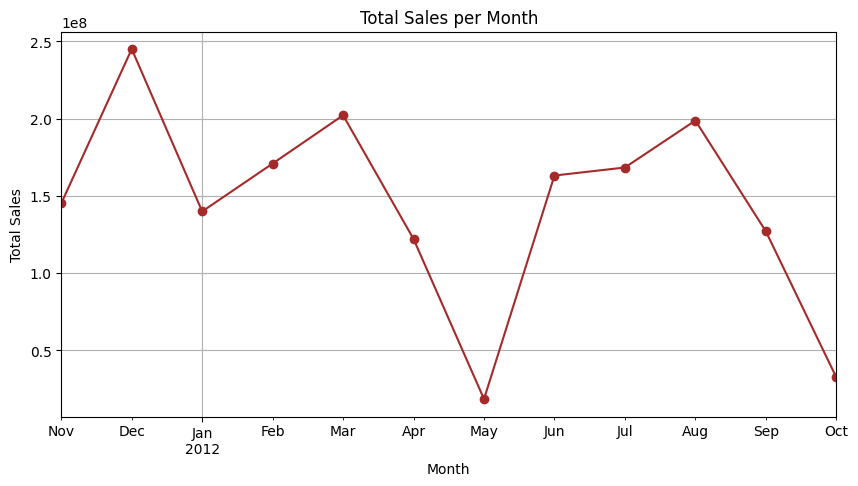

In [20]:
# Convert the 'Date' column to datetime data type
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the DataFrame index
data.set_index('Date', inplace=True)

# Resample the data by month and calculate total sales per month
sales_per_month = data['Weekly_Sales'].resample('M').sum()

# Plot the monthly sales data
sales_per_month.plot(color='brown', figsize=(10, 5), marker='o', linestyle='-')
plt.title('Total Sales per Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()


**Insight:**

The analysis from the weekly sales line plot reveals several noticeable trends within the available data:

1. **Maximum Sales Peaks:** There are notable peaks in sales at the end of the year, likely attributed to common Year End Sales promotional strategies. This indicates a significant surge in sales towards the year-end period.

2. **Price Hike Patterns:** There's a pattern of increased sales coinciding with price hikes at specific times:
    - **Year End (November-December):** This period shows the peak sales, possibly influenced by large-scale promotional campaigns towards the end of the year.
    - **Winter to Spring Transition (February-March):** There's an uptick after the winter months heading into spring, possibly linked to a return in shopping activity after the holiday period.
    - **Summer Season (June-August):** There's an observed increase in sales during the summer months, likely due to holiday activities or summer promotions.

3. **Sales Decline:** Declines are observed during the Spring season (March-May) and the transition from Summer to Fall (August-October).

**4.3 Checking for Duplicate Entries**

*In this section, we will perform a check for duplicate entries present in this dataset.*

In [6]:
# Counting the number of rows that are duplicates
duplicate_rows_count = data.duplicated().sum()

print(f"Number of duplicate rows: {duplicate_rows_count}")

Number of duplicate rows: 0


**Insight:**

There are no duplicate entries in the dataset. Next, we will proceed to check the missing values in the dataset.

**4.4 Missing Values Analysis**

*In this section, we will investigate the quantity, information, and patterns of the missing values within this dataset.*

In [22]:
missing = data.isnull().sum() # Initializing the 'missing' variable to calculate the total number of missing values in the dataset
missing_percentage = (data.isnull().sum() / len(data)) * 100 # Initializing the percentage of missing values in the dataset
info_missing = pd.DataFrame({'Number of Missing Values': missing, 'Percentage of Missing Values': missing_percentage}) # Initializing a variable to display the number of missing values along with their percentages per feature in the dataset
info_missing # Displaying the result of missing values calculation in a da

,Number of Missing Values,Percentage of Missing Values
Store,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
MarkDown1,0,0.0
MarkDown2,0,0.0
MarkDown3,0,0.0
MarkDown4,0,0.0
MarkDown5,0,0.0
CPI,0,0.0
Unemployment,0,0.0


**Insight:**

No missing values found in the dataset

**4.5 Data Distribution Analysis**

In [23]:
# Displaying Descriptive Statistical Analysis of Numerical Columns in the Dataset
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,97056.0,20.239408,12.037946,1.00000,10.000000,20.000000,29.000000,45.000000
Temperature,97056.0,57.348331,18.263734,7.46000,42.750000,57.950000,72.660000,95.910000
Fuel_Price,97056.0,3.618946,0.280003,3.03100,3.413000,3.630000,3.820000,4.301000
MarkDown1,97056.0,8841.260245,9258.091154,32.50000,3600.790000,6264.180000,10333.240000,88646.760000
MarkDown2,97056.0,3693.532392,10058.901796,-265.76000,47.550000,192.000000,2551.320000,104519.540000
MarkDown3,97056.0,1816.629491,10989.284083,-29.10000,5.400000,30.460000,123.420000,141630.610000
MarkDown4,97056.0,4025.923108,7173.060535,0.46000,605.880000,1739.830000,4082.990000,67474.850000
MarkDown5,97056.0,5310.830581,6535.397883,170.64000,2383.670000,3864.600000,6197.530000,108519.280000
CPI,97056.0,174.766754,39.652638,129.81671,136.856419,189.194056,219.355063,227.036936
Unemployment,97056.0,7.414578,1.708319,4.07700,6.392000,7.280000,8.256000,12.890000


**Insight:**

1. **Temperature:**
   - The recorded average temperature is 57.35°F with a standard deviation of 18.26°F. Temperatures range between 7.46°F to 95.91°F.
2. **Fuel_Price:**
   - The average fuel price is 3.62 with a standard deviation of 0.28. The fuel price ranges from 3.03 to 4.30.
3. **MarkDown1 - MarkDown5:**
   - The mean and standard deviation of MarkDown1 to MarkDown5 are considerably high, indicating significant variations in the data. The range of values is substantial for each type of MarkDown.
4. **CPI (Consumer Price Index):**
   - The average CPI is 174.77 with a standard deviation of 39.65. The CPI ranges from 129.82 to 227.04.
5. **Unemployment:**
   - The average unemployment rate is 7.41% with a standard deviation of 1.71%. Unemployment rates range from 4.08% to 12.89%.
6. **Size:**
   - The average store size is 155,229 with a standard deviation of 51,201. Store sizes range from 34,875 to 219,622.
7. **Dept (Departments):**
   - The average number of departments in a store is 44.28 with a standard deviation of 30.12. The data ranges from 1 to 99 departments.
8. **Weekly_Sales:**
   - The average weekly sales amount to 17,857 with a standard deviation of 24,732. Weekly sales range from -1,699 to 630,999.

The data exhibits significant variation among these variables with varying values for each feature. This highlights the differences in scale and range that should be considered in analysis and modeling. Normalization or scaling adjustments might be necessary for some variables with significantly large value ranges for effective use in modeling.

In [24]:
# Filter columns to be analyzed -> numerical features 
numeric_features = data.select_dtypes(include=np.number)
# Calculate skewness and kurtosis for numerical columns
skewness = numeric_features.skew()
kurtosis = numeric_features.kurtosis()

# Create a DataFrame 'summary' containing skewness and kurtosis values for each numeric column
skewkurt = pd.DataFrame({'Skewness': skewness, 'Kurtosis': kurtosis})

skewkurt

,Skewness,Kurtosis
Store,0.234642,-0.902426
Temperature,-0.118864,-0.918870
Fuel_Price,0.004420,-0.589169
MarkDown1,3.212952,14.892338
MarkDown2,5.103532,32.883661
MarkDown3,7.484381,60.979236
MarkDown4,4.263339,22.516157
MarkDown5,7.814230,95.952109
CPI,0.076962,-1.831023
Unemployment,0.609964,1.213364


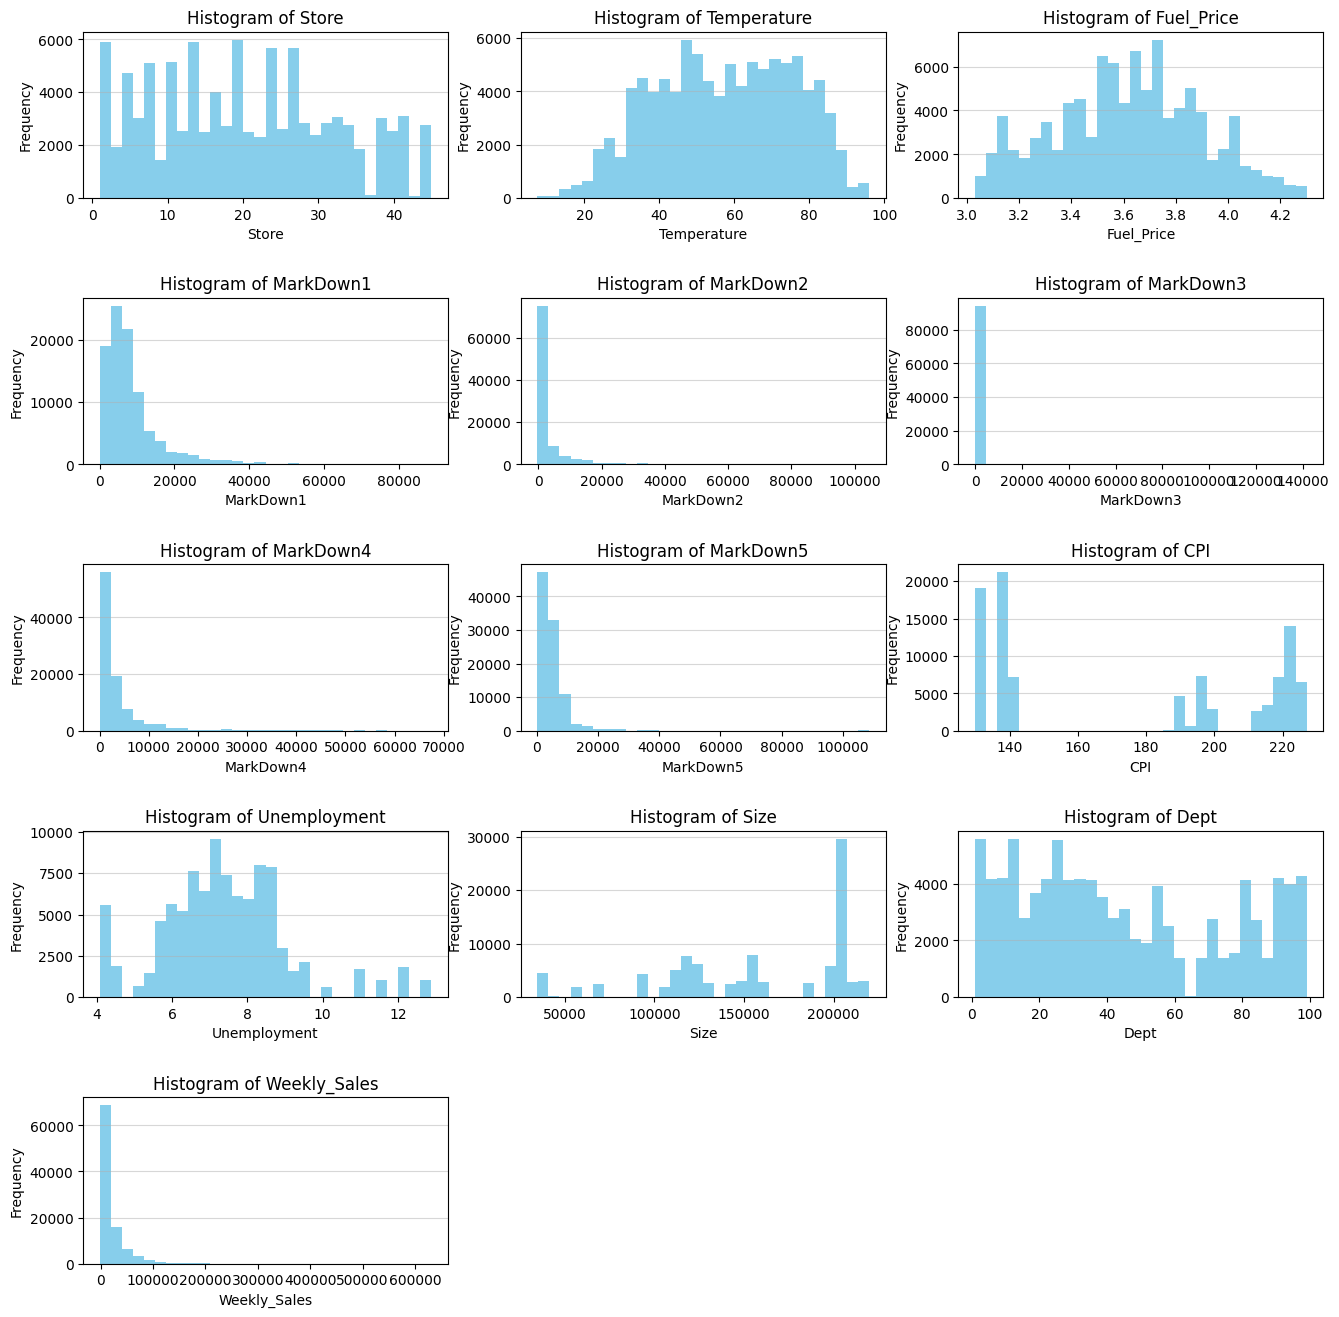

In [25]:
# Create histogram subplots for each numeric column
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(16, 16))
fig.subplots_adjust(hspace=0.6)

axes = axes.flatten()

# Iterate over each column in the skewkurt DataFrame
for i, column in enumerate(skewkurt.index):
    ax = axes[i]
    ax.hist(data[column], bins=30, color='skyblue')
    ax.set_title(f'Histogram of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.grid(axis='y', alpha=0.5)

for i in range(len(skewkurt.index), len(axes)):
    fig.delaxes(axes[i])

plt.show()

**Insights :**

1. **Store:** Being a categorical variable or unique identifier, it does not have a numerical distribution that can be interpreted through a histogram. This variable merely represents different stores.
2. **Temperature:** The data distribution seems fairly symmetrical with a slightly negative skewness. This indicates a tendency for the data to lean left, meaning the distribution slightly favors lower temperatures. There are no strong indications of extreme tails in the temperature distribution.
3. **Fuel_Price:** The data distribution appears relatively symmetrical with skewness close to zero. The data distribution tends to be normal but may have a slight rightward tail, suggesting a slight tendency for fuel prices to increase.
4. **MarkDown1 - MarkDown5:** These variables have high positive skewness and very high kurtosis, indicating that the data distribution has an extremely long tail to the right. This suggests the presence of very high values (outliers) in these columns.
5. **CPI (Consumer Price Index):** The data distribution seems fairly symmetrical with skewness approaching zero. The data slightly leans towards the right, but it's not too significant.
6. **Unemployment:** The data distribution has slightly positive skewness, indicating a slight tendency to lean towards the right. However, it's not too significant and doesn't show extreme tails in the data distribution.
7. **Size:** The data distribution has negative skewness, indicating a tendency to lean left, but it's not too significant. There are no strong indications of extreme tails in this store size distribution.
8. **Dept:** The data distribution has moderate positive skewness. It leans to the right, indicating a tendency for higher values, but it doesn't show significant extreme tails.
9. **Weekly_Sales:** The data distribution has high positive skewness and very high kurtosis, suggesting an extremely long tail to the right. This indicates the presence of very high values (outliers) in the weekly sales column.

In conclusion, most variables exhibit asymmetric distributions, with some displaying longer tails on the extreme right (positive). This is crucial to consider in further analysis and statistical or machine learning modeling, especially in handling outliers and adjusting the data distribution to achieve more accurate and representative results.

**4.6 Outliers Identification Analysis**

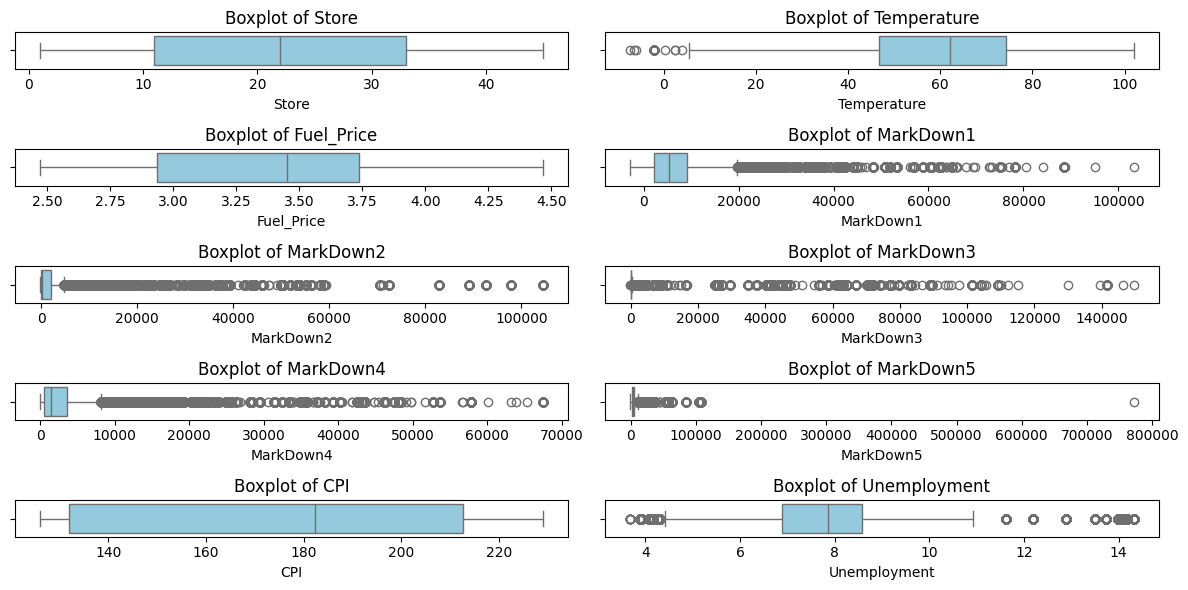

Outliers Percentage:
+--------------+-------------+-------------+
| Attribute    | Lower Bound | Upper Bound |
+--------------+-------------+-------------+
| Store        |    0.00%    |    0.00%    |
| Temperature  |    0.02%    |    0.00%    |
| Fuel_Price   |    0.00%    |    0.00%    |
| MarkDown1    |    0.00%    |    2.32%    |
| MarkDown2    |    0.00%    |    4.19%    |
| MarkDown3    |    0.00%    |    4.50%    |
| MarkDown4    |    0.00%    |    3.08%    |
| MarkDown5    |    0.00%    |    1.85%    |
| CPI          |    0.00%    |    0.00%    |
| Unemployment |    1.95%    |    5.65%    |
| Size         |    0.00%    |    0.00%    |
| Dept         |    0.00%    |    0.00%    |
| Weekly_Sales |    0.00%    |    8.39%    |
+--------------+-------------+-------------+


In [40]:
n_subplot = 2  # Set the number of plots in a row
n_baris = len(numeric_features) // n_subplot + 1  # Calculate the number of rows

# Define the number of images to be displayed
num_images = n_baris // 10 + 1

# Set the image size
plt.figure(figsize=(12, 6))

# Loop to display boxplots
for index, attributes in enumerate(numeric_features):
    if index < 10:  # Ensure no 11th subplot
        plt.subplot(5, 2, index + 1)
        sns.boxplot(x=data[attributes], color='skyblue', orient='v')
        plt.title(f'Boxplot of {attributes}')
        plt.ylabel('')

plt.tight_layout()
plt.show()

# Create an empty list to store the percentage of outliers
results = []

# Define the threshold to define outliers
outlier_threshold = 1.5

# Initialize dictionary to store the percentage of outliers
outliers_percentage = {}

# Calculate the IQR (Interquartile Range) values and outliers
for attribute in numeric_features:
    Q1 = data[attribute].quantile(0.25)
    Q3 = data[attribute].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds
    lower_bound = Q1 - outlier_threshold * IQR
    upper_bound = Q3 + outlier_threshold * IQR

    # Identify outliers
    outliers_lower = data[data[attribute] < lower_bound]
    outliers_upper = data[data[attribute] > upper_bound]

    # Calculate percentage of lower bound outliers
    percentage_lower = len(outliers_lower) / len(data) * 100

    # Calculate percentage of upper bound outliers
    percentage_upper = len(outliers_upper) / len(data) * 100

    # Append results to the list
    results.append([attribute, f"{percentage_lower:.2f}%", f"{percentage_upper:.2f}%"])

# Create a table using PrettyTable
table = PrettyTable(["Attribute", "Lower Bound", "Upper Bound"])

# Insert data into the "Outliers Percentage" table
for result in results:
    table.add_row(result)

# Set column alignment
table.align["Attribute"] = "l"
table.align["Lower Bound"] = "c"
table.align["Upper Bound"] = "c"

# Print the table
print("Outliers Percentage:")
print(table)

**Insights :**

1. **Store:** No outliers detected.
2. **Temperature:** There's a small amount of data considered outliers at the Lower Bound, around 0.02%, but there are no outliers at the Upper Bound.
3. **Fuel_Price:** No outliers detected.
4. **MarkDown1-5:** Each MarkDown variable shows outliers, with the highest percentage of outliers in MarkDown3 at approximately 4.50% at the Upper Bound and the lowest in MarkDown1 at around 2.32% at the Upper Bound.
5. **CPI:** No outliers detected.
6. **Unemployment:** There are around 1.95% of data considered outliers at the Lower Bound and about 5.65% at the Upper Bound.
7. **Size:** No outliers detected.
8. **Dept:** No outliers detected.
9. **Weekly_Sales:** Significantly shows outliers with approximately 8.39% of data at the Upper Bound.

- MarkDown variables (MarkDown1 to MarkDown5), Unemployment, and Weekly_Sales indicate a significant proportion of data considered outliers, both at the upper and lower bounds.
- There's substantial variation in the presence of outliers among these variables. This highlights the need for handling procedures, such as removal or specific processing, to address these outliers.

**4.7 Feature Correlation Analysis**

In this section, an analysis of the correlation between features in the dataset will be conducted using the Phik matrix. Phik correlation is chosen due to its ability to handle outliers and, notably, its excellence in comparing correlations between numerical and categorical features. Phik correlation possesses several advantages, including:

- **Handling both categorical and numerical data:** Phik correlation allows the simultaneous use of categorical and numerical data in the correlation matrix. This is particularly beneficial in this project, which comprises a mix of categorical and numerical features, enabling a comprehensive analysis of the entire dataset.
  
- **Invariance to permutations and sorting:** Phik correlation remains unaffected by permutations or changes in the order of feature values, ensuring consistent correlation results irrespective of data reordering or alterations.
  
- **Ability to handle outliers:** The Phik correlation method tends to be more robust against outliers when compared to other parametric correlations. This attribute makes it suitable for use in projects dealing with outliers, as it still provides relevant insights into the relationships between features despite the presence of extreme values in the dataset.

In [26]:
data.columns

Index(['Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales'],
      dtype='object')

In [41]:
# Defining list features
attributes = ['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size', 'Dept', 'Weekly_Sales']


# Determining interval columns for phik matrix calculation
interval_cols = ['Weekly_Sales']

# Calculating the phik matrix for analyzing feature correlations
phik_overview = data[attributes].phik_matrix(interval_cols=interval_cols)

# Function to categorize correlation
def categorize_correlation(phik_overview):
    if  phik_overview > 0.5:
        return 'High_Positive_Correlation'
    elif phik_overview > 0.1:
        return 'Moderate_Positive_Correlation'
    elif phik_overview > 0:
        return 'Low_Positive_Correlation'
    elif phik_overview < -0.5:
        return 'High_Negative_Correlation'
    elif phik_overview < -0.1:
        return 'Moderate_Negative_Correlation'
    else:
        return 'Low_Negative_Correlation'
    
# DataFrame for categorical correlations
correlation_df = phik_overview.applymap(categorize_correlation)
correlation_df


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
Store,High_Positive_Correlation,Moderate_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Moderate_Positive_Correlation
Date,Moderate_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Moderate_Positive_Correlation,Moderate_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
Temperature,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
Fuel_Price,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown1,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown2,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown3,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown4,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positive_Correlation
MarkDown5,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,High_Positive_Correlation,Low_Negative_Correlation,Moderate_Positi

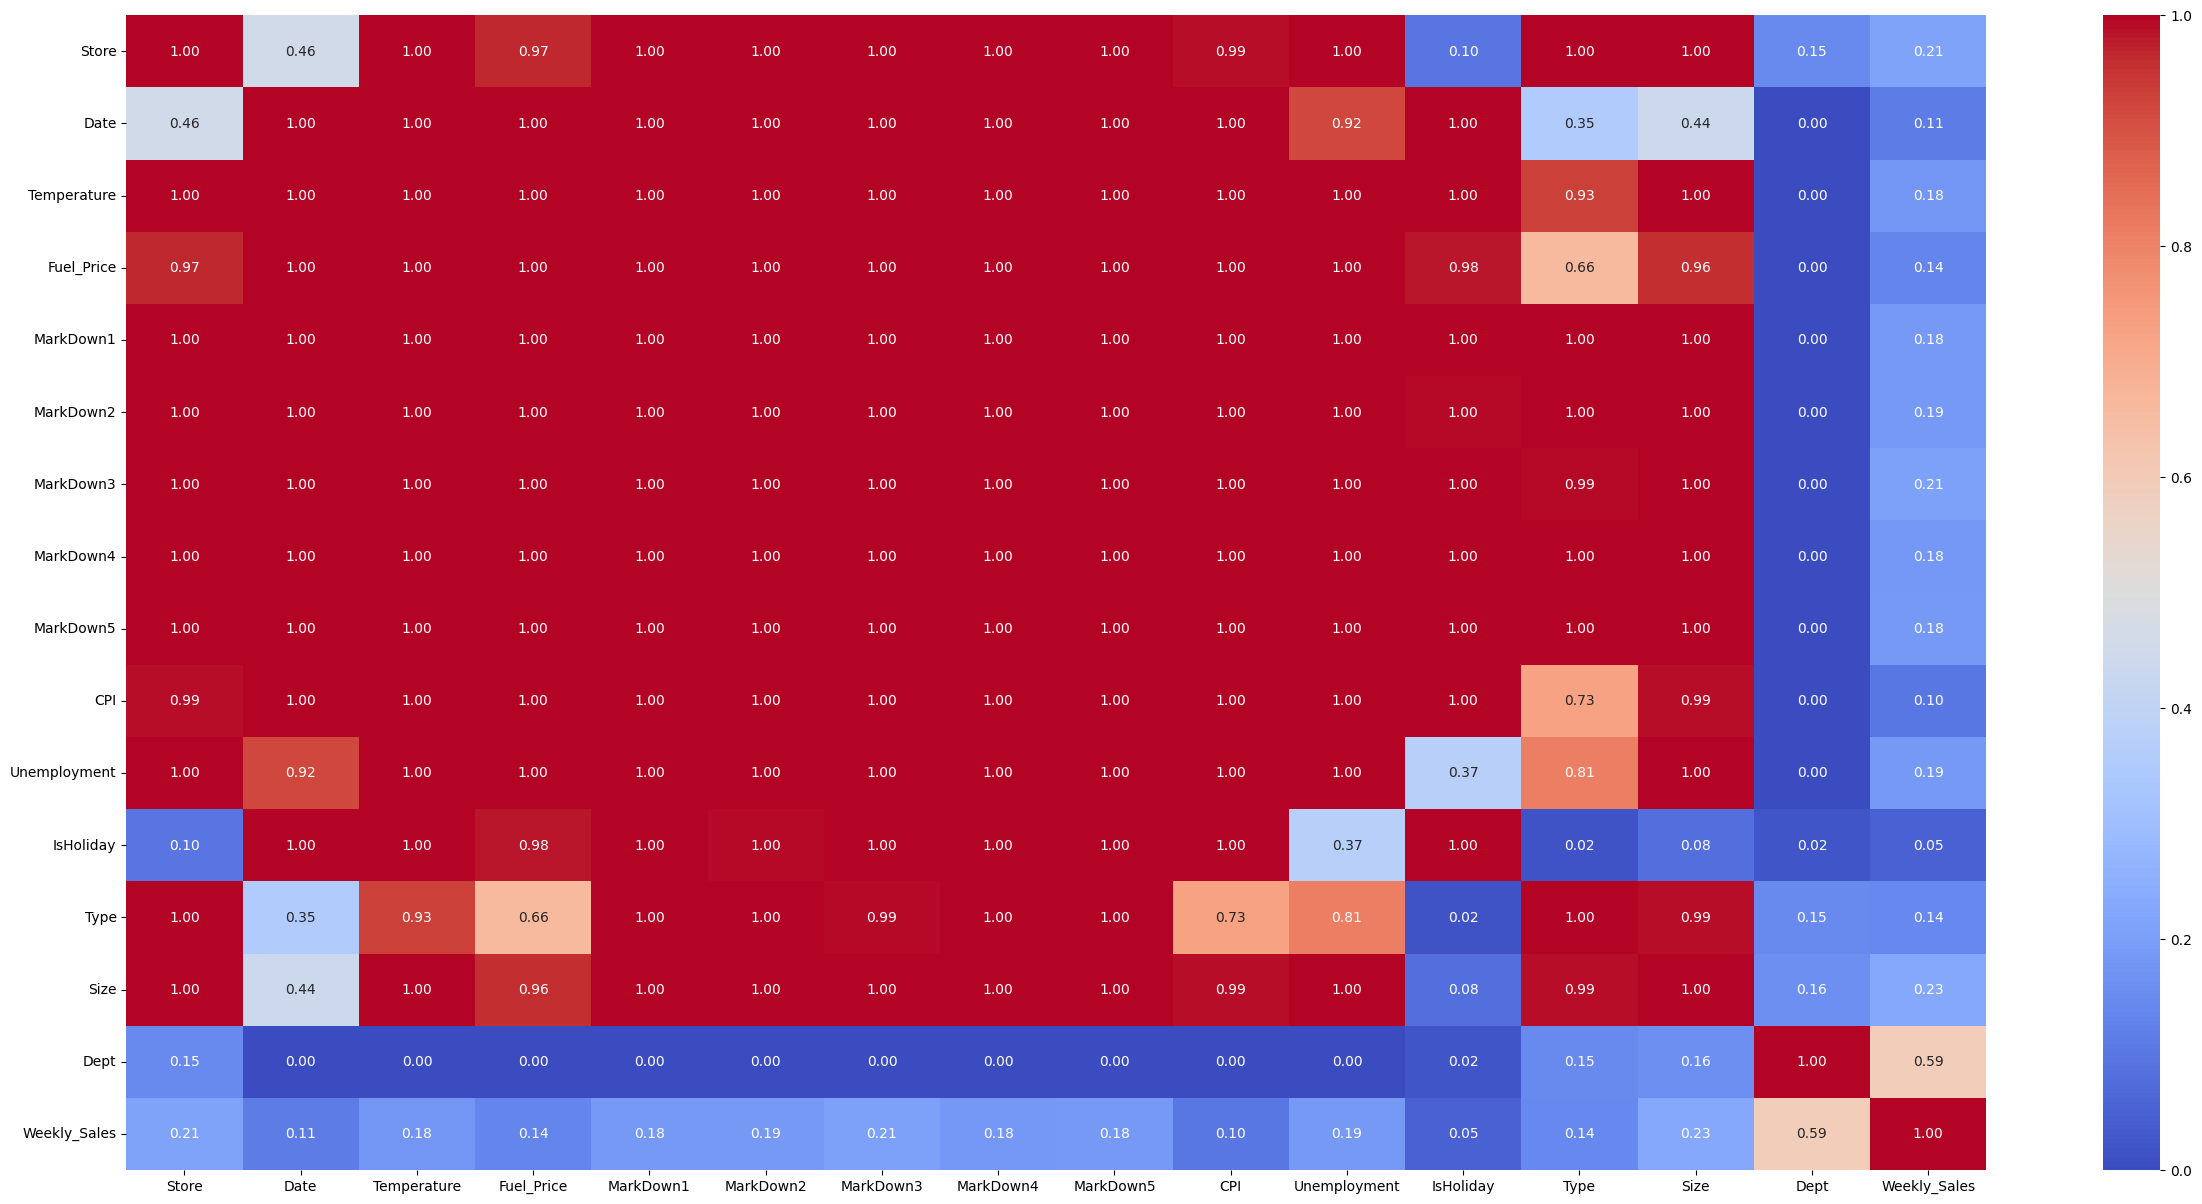

In [24]:
# Creating a heatmap with correlation number annotation
plt.figure(figsize=(30, 15))
sns.heatmap(phik_overview, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Displaying the heatmap
plt.show()

**Insight:**

From the provided correlation analysis, it is evident that the following features:
- 'Dept'
- 'Size'
- 'Store'
- 'Date'
- 'Temperature'
- 'Fuel_Price'
- 'MarkDown 1-5'
- 'Unemployment'
- 'Type'

Exhibit significant correlations and can be crucial in the process of creating a predictive model for weekly sales estimation. They can serve as vital components in the predictive model creation to estimate weekly sales accurately. Therefore, further exploration is essential to directly observe the influence of these features on the resulting weekly sales.

In [25]:
# Categorize the features identified as significant features to further analyze its influence towards weekly sales
significant_features=['Dept','Size','Store','Date','Temperature','Fuel_Price','Unemployment','Type', 'CPI']

In [26]:
# Categorize the markdowns to further analyze its influence towards weekly sales
markdown = ['MarkDown1','MarkDown2','MarkDown3', 'MarkDown4','MarkDown5']

**4.8 Analysis of the Impact of Significant Features on Weekly Sales**

In this section, we will observe the influence of significant features in the dataset on the obtained weekly sales.

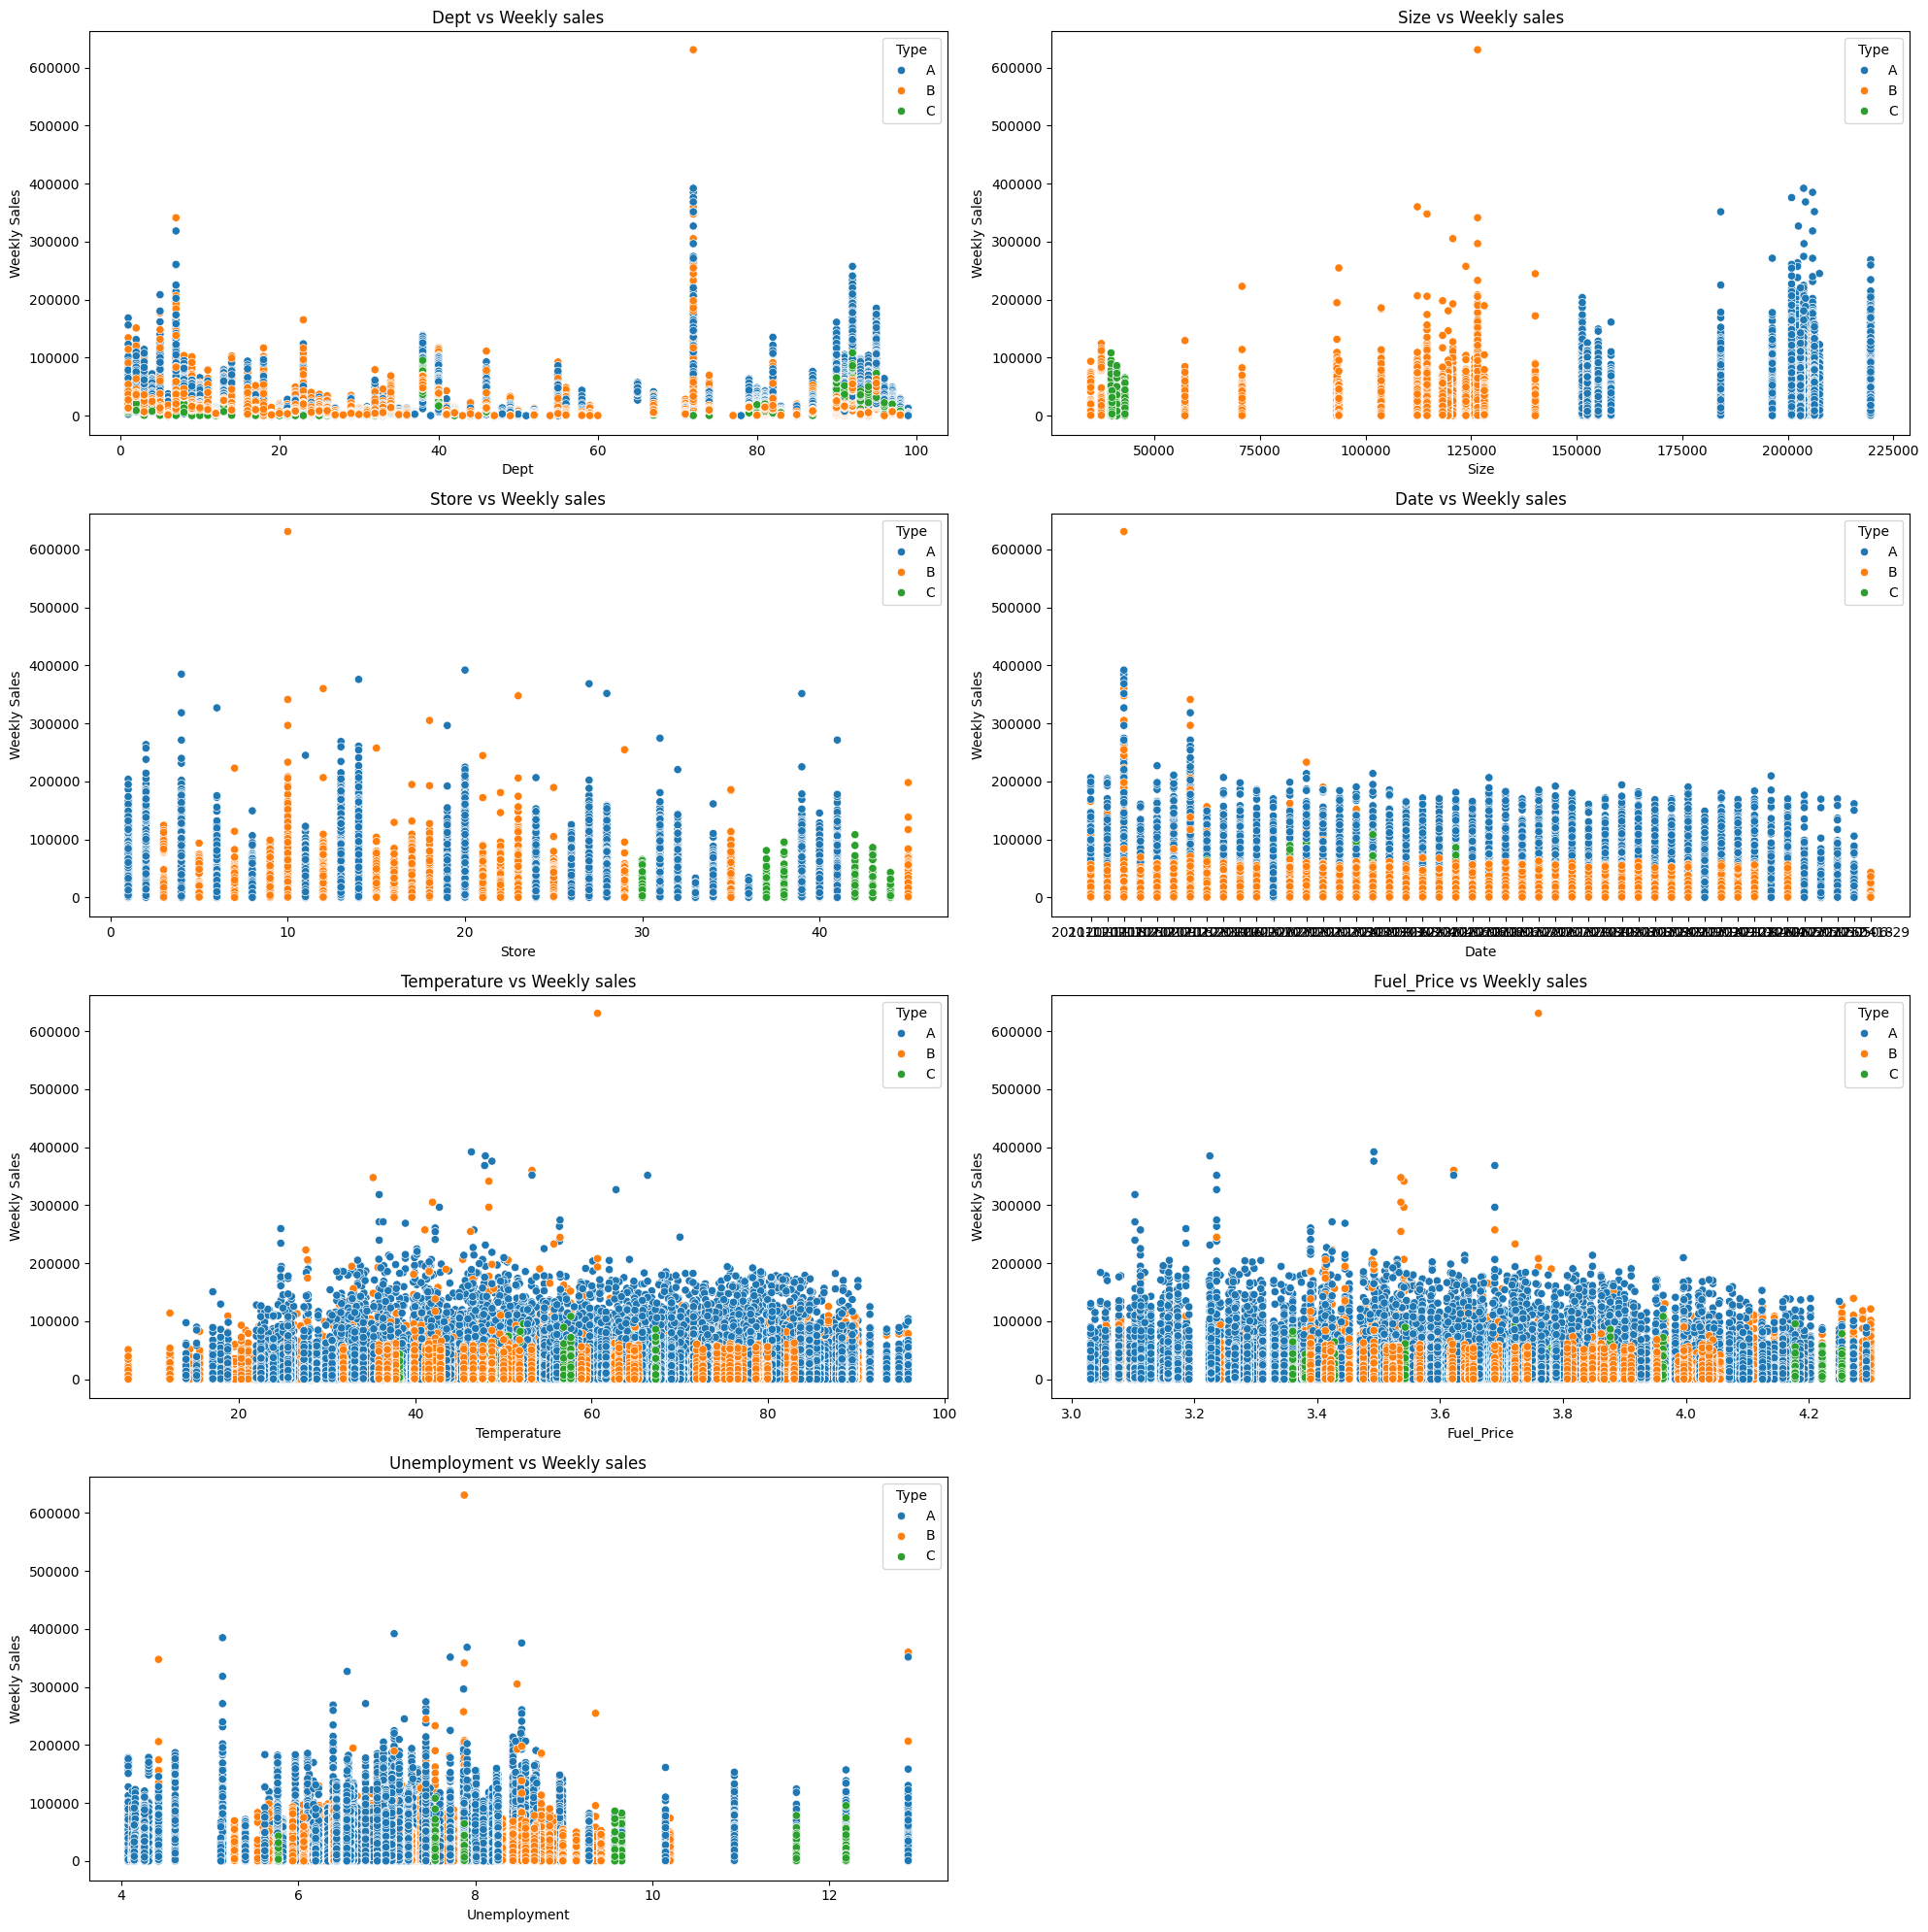

In [27]:
plt.figure(figsize=(20, 20))
for i in range(7):
    plt.subplot(4, 2, i + 1)
    sns.scatterplot(data=data, x=significant_features[i], y='Weekly_Sales', hue='Type')
    plt.title(f'{significant_features[i]} vs Weekly sales')
    plt.xlabel(significant_features[i])
    plt.ylabel('Weekly Sales')

plt.tight_layout()
plt.show()


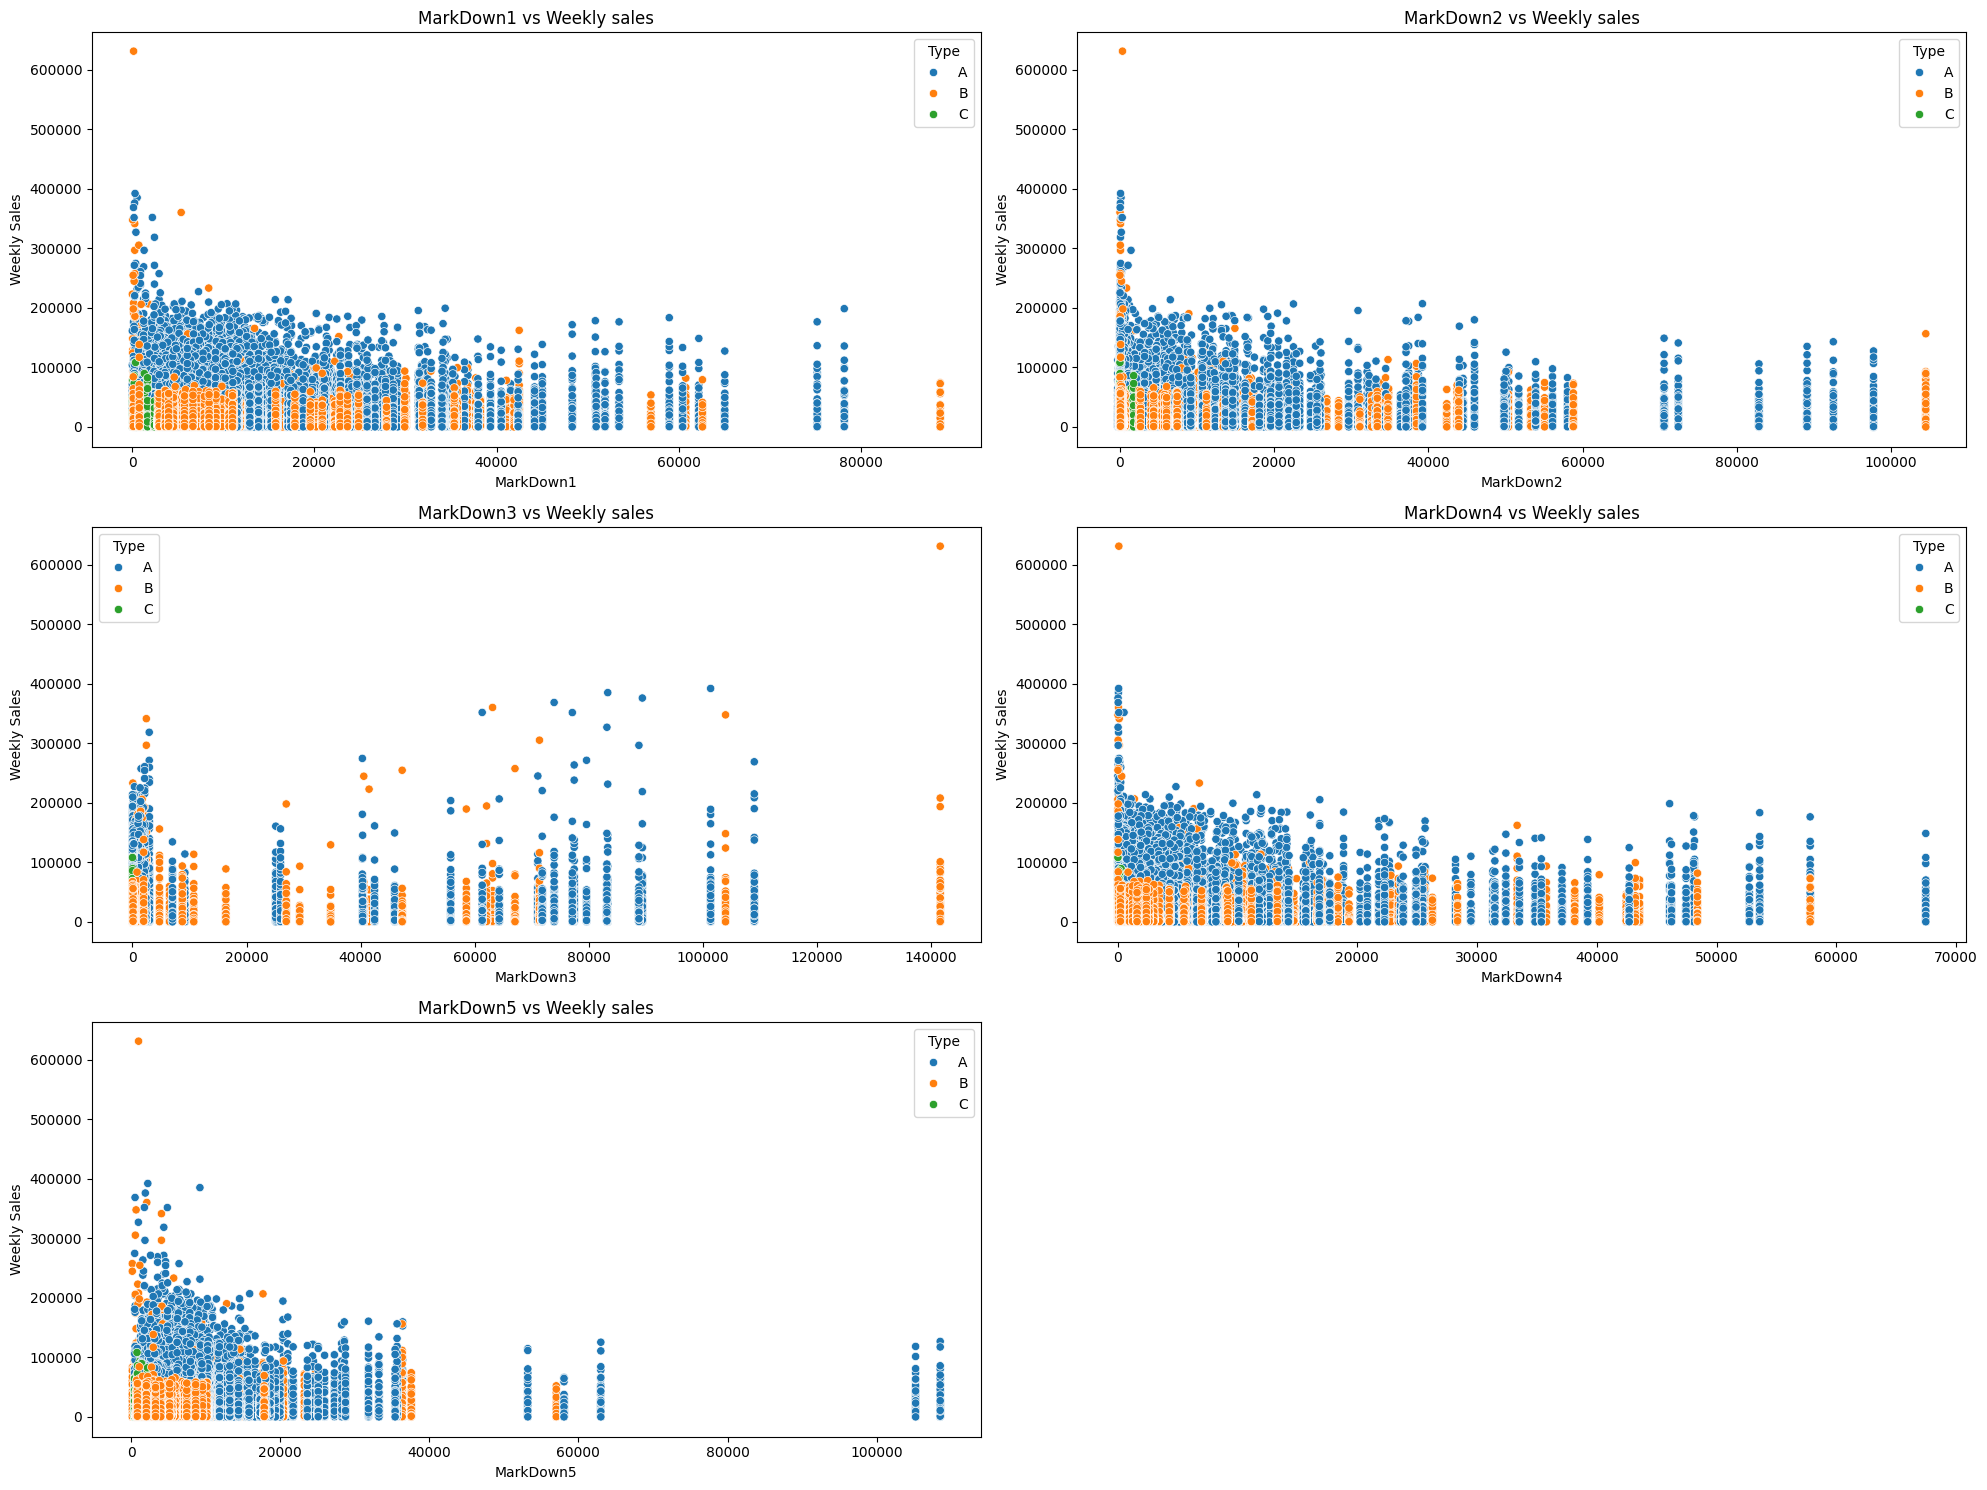

In [28]:
plt.figure(figsize=(20, 15))
for i in range(5):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=data, x=markdown[i], y='Weekly_Sales', hue='Type')
    plt.title(f'{markdown[i]} vs Weekly sales')
    plt.xlabel(markdown[i])
    plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

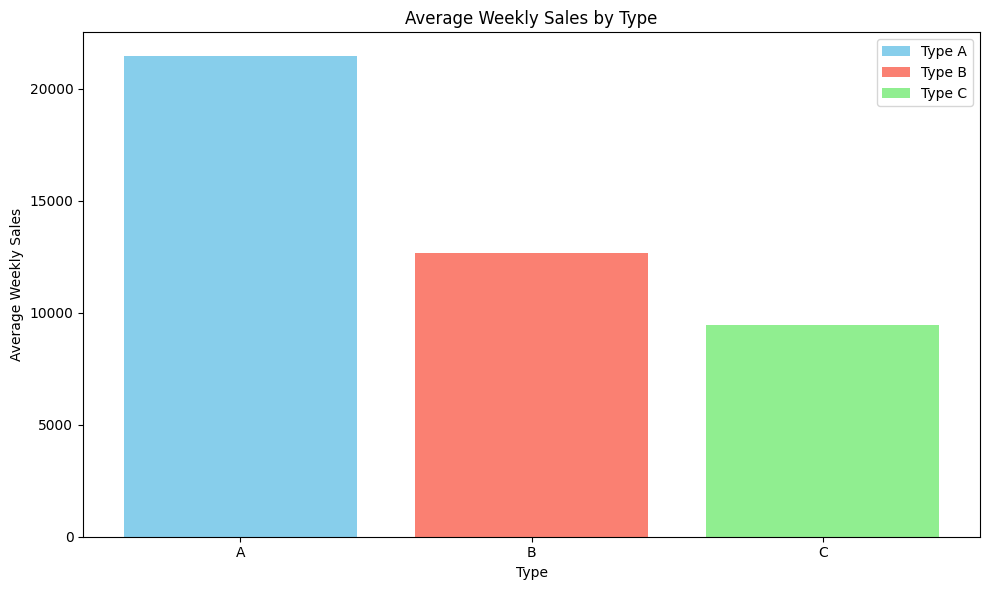

In [27]:
# Calculating the Mean of Weekly Sales of different types of stores.
avg_sales_by_type = data.groupby('Type')['Weekly_Sales'].mean().reset_index()

# Create a color palette for different store types
colors = {'A': 'skyblue', 'B': 'salmon', 'C': 'lightgreen'}

plt.figure(figsize=(10, 6))

# Initiating the barplot
for index, row in avg_sales_by_type.iterrows():
    plt.bar(row['Type'], row['Weekly_Sales'], color=colors[row['Type']], label=f'Type {row["Type"]}')

plt.xlabel('Type')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales by Type')
plt.legend()
plt.tight_layout()
plt.show()

**Insight:**

Based on the correlation analysis concerning weekly sales ('Weekly Sales'), several significant findings have emerged:

1. **Department (Dept):** There's a reasonably strong positive correlation (0.52) between department and weekly sales. Higher 'Dept' values tend to relate to higher weekly sales. Department 72 shows the highest sales, indicating that this department might have the most sought-after or top-selling products among others.

2. **Store Size (Size):** The positive correlation between store size and weekly sales indicates that larger stores have higher weekly sales.

3. **Store Number (Store):** Though the correlation is not very strong, there is a positive relationship between store number and weekly sales. Some stores show higher weekly sales; for instance, store number 10 stands out with the highest weekly sales among others, suggesting that store number 10 might have an edge contributing to higher sales compared to other stores.

4. **Date:** The relatively low correlation indicates that the date has an insignificant influence on weekly sales.

5. **Temperature:** There's a positive correlation between temperature and weekly sales, although not very strong. There seems to be an increase in sales when the temperature ranges between 45-60 Fahrenheit. This phenomenon might indicate certain purchasing preferences associated with environmental temperature. Product placement or promotions tailored to this temperature range could be key to boosting sales.

6. **Fuel Price:** Despite a weak positive correlation between fuel price and weekly sales, it's evident that sales tend to increase when the fuel price is lower, especially below 3.8. This may indicate that besides consumer sensitivity to cheaper fuel reducing transportation costs, there's also potential for a decrease in product selling prices influenced by deflation. This could increase consumer purchasing power, supporting sales growth during lower fuel price periods.

7. **Markdown 1-5:** There's moderate or less significant correlation between some types of markdown and weekly sales. For markdown 1, 2, 4, and 5, there's a tendency that lower markdown prices are associated with increased weekly sales. However, for markdown 3, the opposite occurs, where higher markdown values lead to increased weekly sales. This indicates the need for different pricing strategies for each markdown type to achieve optimal sales outcomes.

8. **Unemployment Rate:** Although there's less significant correlation between the unemployment rate and weekly sales, a tendency was found that weekly sales tend to increase when the unemployment rate ranges between 7.00 to 9.00. This might suggest potential sales growth when the unemployment rate is at those levels. One possible reason could be that within this range, consumers have more income allowing them to make more purchases. Proper marketing strategies are required to capture this opportunity.

9. **Store Type:** There is a significant correlation between store type and weekly sales. Store type A exhibits the highest average sales, followed by type B, while type C shows the lowest sales. This insight correlates with the influence of store size on weekly sales, indicating that stores with larger sizes tend to yield higher weekly sales.

These findings illustrate various factors related to weekly sales and provide insights into their influence on store performance.

**4.9 Conclusions of Exploratory Data Analysis Process**

In this project, several valuable insights have been discovered regarding the influence of various features on 'Weekly_Sales' in a retail store. Here are the conclusions drawn from these insights:

1. **Impact of Store-Related Features on Weekly Sales:**
   - **Dept (Departments):** There exists a reasonably strong positive relationship between departments and weekly sales.
   - **Size (Store Size):** A positive correlation is evident between store size and weekly sales. Larger-sized stores tend to have higher weekly sales.
   - **Store (Store Number):** A positive correlation exists between store number and weekly sales, although not particularly strong.
   - **Type (Store Type):** Significant differences are seen in weekly sales among store types. Store type A shows the highest average weekly sales compared to types B and C.

2. **Influence of Non-Store Variables on Weekly Sales:**
   - **Date:** Does not show a significant correlation with weekly sales, but it still impacts changes in weekly sales.
   - **Temperature:** Weak positive correlation with weekly sales. However, scatter plot correlation analysis revealed a considerable increase in weekly sales occurring within a specific temperature range, namely 45-60 Fahrenheit.
   - **Fuel_Price:** Despite a weak positive correlation between fuel prices and weekly sales, sales tend to increase when fuel prices are lower, especially below 3.8.
   - **Markdowns (Price Reductions):** There is a moderate to less significant correlation between some markdown types and weekly sales. Markdowns 1, 2, 4, and 5 tend to correlate lower markdown prices with increased weekly sales. However, for markdown 3, the opposite is observed, where higher markdown values correlate with increased weekly sales.

3. **Economic Variables:**
   - **CPI (Consumer Price Index) & Unemployment:** Show relatively less significant correlation with weekly sales.

4. **Weekly Sales Analysis:**
   Weekly sales trends exhibit significant variations, with **increases in specific trends** observed during periods:
   - **End of Year** (November-December).
   - **Seasonal Transition** from Winter to Spring (February-March).
   - **Summer Months** (June-August).

5. **General Conclusion:**
   - Internal factors such as departments, size, store type, and markdown types have a relatively significant impact on weekly sales.
   - External factors such as temperature, fuel prices, CPI, and unemployment have a less significant impact on weekly sales.
   - Increases in weekly sales are seen during specific periods, namely the **end of the year** (November-December), **seasonal transitions** from Winter to Spring (February-March), and the **summer months** (June-August).

**Preprocessing Plans**

- It is necessary to perform Feature Selection to ensure the forecasting model's optimal capability by using features that have significant correlation with weekly sales.
- Scaling of features and label encoding (for the 'Type' feature) is required.
- Outliers handling is necessary.

Before moving into the Feature Engineering stage, we need to address the column `Dept`. This is due to the mismatched data type of this column. The `Dept` column might not be an integer data type.

To handle this, `Dept` column needs to be converted to an integer data type using the `astype` method in Pandas.

By adjusting the data type, we ensure that the column is interpreted correctly as integer data type. This step needs to be performed before proceeding to the next stage in the Feature Engineering.

In [28]:
# Changing the data type of the "Dept" column to integer
data['Dept'] = data['Dept'].astype(int)

data.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
Date,,,,,,,,,,,,,,,
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,1,18689.54
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,2,44936.47
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,3,9959.64
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,4,36826.52
2011-11-11,1,59.11,3.297,10382.9,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False,A,151315,5,31002.65


---

**4.11 Export Dataframe to CSV**

In this section, the dataframe that has undergone exploration and several changes will be exported as a CSV file to serve as a new dataset for the subsequent Feature Engineering process.

In [29]:
data.to_csv("Post-EDA.csv", index=False)